In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [2]:
x = symbols('x')

Исходная функция

In [3]:
f = (sin(x) + cos(x)) ** 3 / ln(4 + x)
f

(sin(x) + cos(x))**3/log(x + 4)

# Часть 1

Границы отрезка

In [4]:
x_0 = 0.5
x_m = 3

Количество узлов

In [5]:
m = 5

Равноотстоящие узлы

In [6]:
X = [0] * (m + 1)
Y = [0] * (m + 1)
for k in range(m + 1):
    X[k] = (x_0 + (x_m - x_0) * k / m)
    Y[k] = f.subs(x, X[k])
    print("x: {}".format(X[k]), "f(x): {}".format(Y[k]))

x: 0.5 f(x): 1.66141120700702
x: 1.0 f(x): 1.63921588273896
x: 1.5 f(x): 0.715050586559032
x: 2.0 f(x): 0.0669358778635805
x: 2.5 f(x): -0.00444752004102781
x: 3.0 f(x): -0.314343578270871


График исходной функции

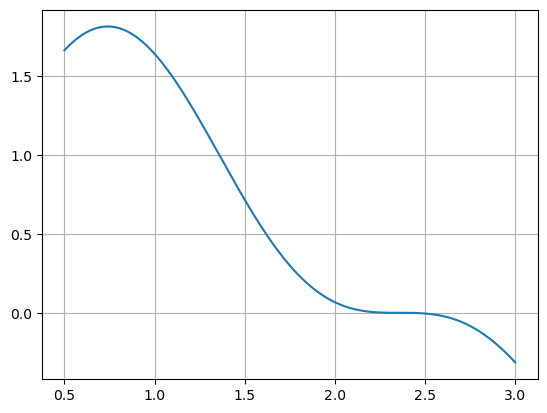

In [7]:
fx = lambdify(x, f, modules = ['numpy'])
x_vals = np.linspace(x_0, x_m, 1000)
plt.plot(x_vals, fx(x_vals))
plt.grid(True)

Интерполяционный полином в форме Лагранжа

In [8]:
Q = 0
t = symbols('t')
for k in range(0, m + 1):
    l = 1
    for i in range(0, m + 1):
        if i != k:
            l = l * ((t - X[i]) / (X[k] - X[i]))
    Q = Q + l * Y[k]

In [9]:
expand(Q)

-0.0636226288886593*t**5 - 0.107723507395038*t**4 + 3.14317933561105*t**3 - 9.84445145444042*t**2 + 9.54697311564271*t - 1.03513897779065

График интерполяционного полинома

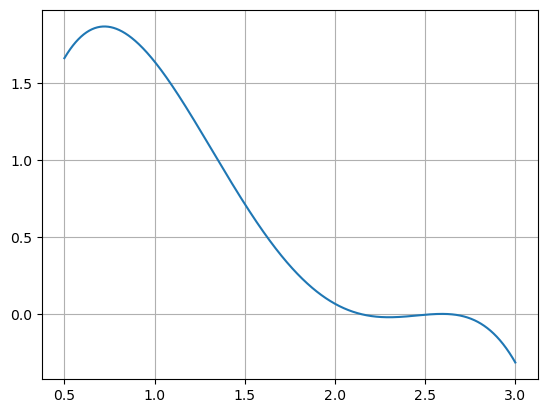

In [10]:
Qt = lambdify(t, Q, modules = ['numpy'])
t_vals = np.linspace(x_0, x_m, 1000)
plt.plot(t_vals, Qt(t_vals))
plt.grid(True)

График модуля ошибки

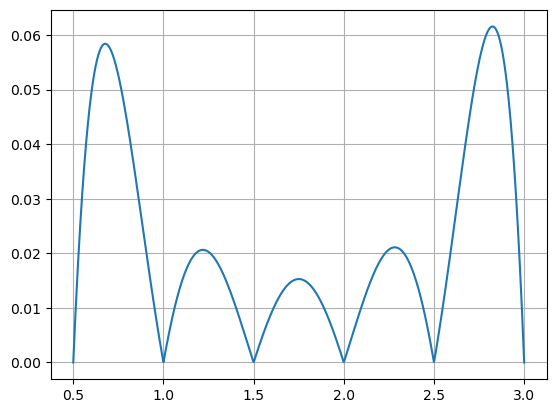

In [11]:
err = lambdify(t, abs(f.subs(x, t) - Q), modules = ['numpy'])
plt.plot(t_vals, err(t_vals))
plt.grid(True)

Относительная ошибка

In [12]:
M_err = max(err(t_vals))
M = max(abs(fx(x_vals)))
M_err / M

0.03397178770771562

Верхняя оценка ошибки интерполяции

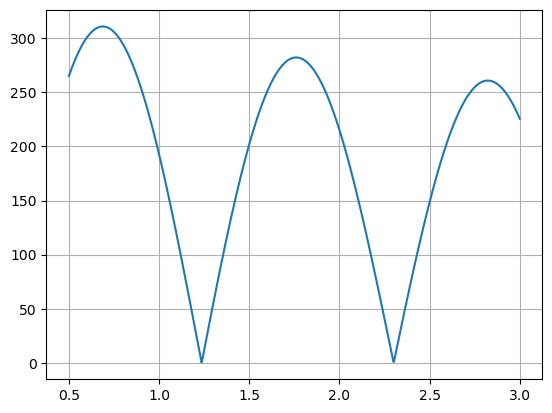

In [13]:
derr = lambdify(x, abs(diff(f, (x, m + 1))), modules = ['numpy'])
plt.plot(x_vals, derr(x_vals))
plt.grid(True)

In [14]:
M = max(derr(x_vals))
M

310.73650355376355

In [15]:
err_max = lambdify(x, M / factorial(m + 1) * abs(prod([(x - X[k]) for k in range(0, m + 1)])), modules = ['numpy'])

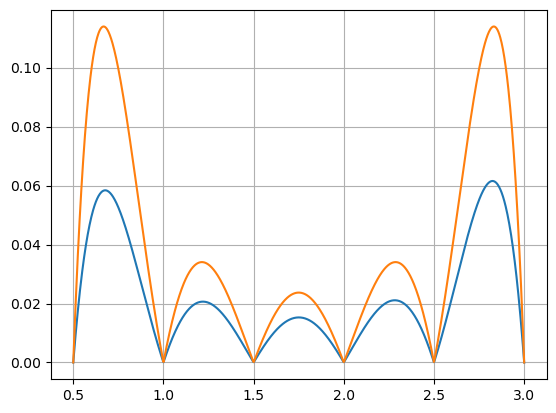

In [16]:
plt.plot(x_vals, err(x_vals))
plt.plot(x_vals, err_max(x_vals))
plt.grid(True)

# Часть 2

Количество узлов

In [17]:
m_T = 6

Сетка по корням полинома Чебышева

In [18]:
X = [0] * (m_T + 1)
Y = [0] * (m_T + 1)
for k in range(1, m_T + 1):
    X[k] = N((x_0 + x_m) / 2 + (x_m - x_0) / 2 * cos(pi * (2 * k - 1) / (2 * m_T)))
    Y[k] = N(f.subs(x, X[k]))

Интерполяционный полином в форме Лагранжа

In [19]:
Q = 0

t = symbols('t')
for k in range(1, m_T + 1):
    l = 1
    for i in range(1, m_T + 1):
        if i != k:
            l = l * ((t - X[i]) / (X[k] - X[i]))
    Q = Q + l * Y[k]

In [20]:
expand(Q)

-0.0627611045304675*t**5 - 0.0726235197738536*t**4 + 2.86909439436662*t**3 - 9.18980806477941*t**2 + 8.98137398453432*t - 0.907630058398001

График интерполяционного полинома

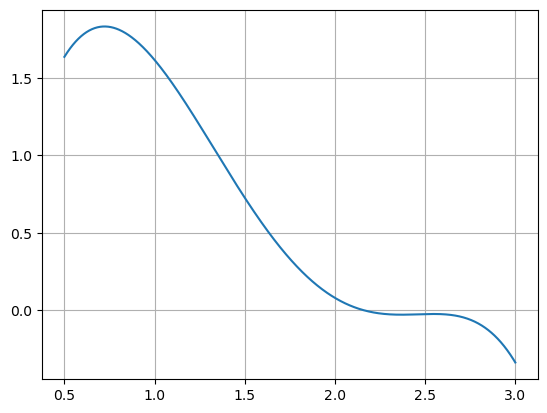

In [21]:
plot_Q = lambdify(t, Q, modules = ['numpy'])
t_vals = np.linspace(x_0, x_m, 1000)
plt.plot(t_vals, plot_Q(t_vals))
plt.grid(True)

График модуля ошибки

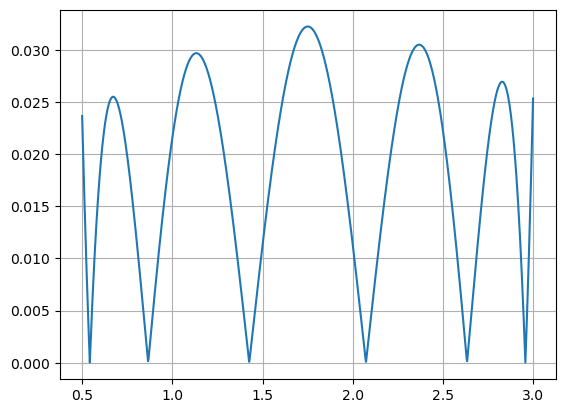

In [22]:
err_cheb = lambdify(t, abs(f.subs(x, t) - Q), modules =['numpy'])
plt.plot(t_vals, err_cheb(t_vals))
plt.grid(True)

Относительная ошибка

In [23]:
M_err = max(err_cheb(t_vals))
M = max(abs(fx(x_vals)))
M_err / M

0.01780073131446157

Сравнение ошибки интерполяции по сетке с равным шагом и по корням полинома Чебышева

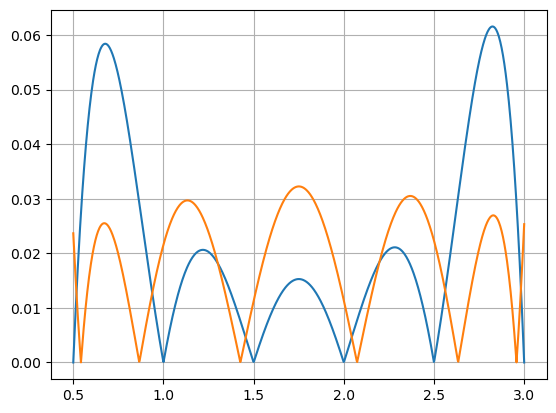

In [24]:
plt.plot(t_vals, err(t_vals))
plt.plot(t_vals, err_cheb(t_vals))
plt.grid(True)